<a href="https://colab.research.google.com/github/shubham-bhadouria/-Seoul-Bike-Sharing-Demand-Prediction/blob/main/Copy_of_Copy_of_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [131]:
# Importing the  common libraries
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import date    #importing for date time application
import datetime as dt
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from graphviz import Source

from IPython.display import SVG
from IPython.display import display


from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb
import warnings; warnings.simplefilter('ignore')

## Mounting Google Drive

In [132]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing Dataset





In [236]:
bike_data = pd.read_csv('/content/drive/MyDrive/Bike sharing demand prediction - Shubham Bhadouria/Copy of SeoulBikeData.csv', encoding= 'unicode_escape')

## Data Overview

In [160]:
#view data head
bike_data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [237]:
#view data tail
bike_data.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [161]:
#Checking number of rows and columns in our dataset.
print("Number of rows is: ", bike_data.shape[0])
print("Number of columns is: ", bike_data.shape[1])

Number of rows is:  8760
Number of columns is:  14


In [162]:
# Checking data type each columns
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [163]:
# Describing data 
bike_data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [164]:
# columns in the dataset
bike_data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [165]:
#checking null values in each columns
bike_data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

So, there are no null values present in our dataset

In [141]:
# total duration of the data
len(bike_data['Date'].unique())

365

The dataset shows hourly rental data for one year (1 December 2017 to 31 November2018)(365 days)

In [166]:
bike_data['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

## Feature Creation

Now, let us extract Date and create some useful new features from this Date features

In [238]:
#extarcting all usefull from date format
bike_data['Date']=pd.to_datetime(bike_data['Date'],format="%d/%m/%Y")
bike_data['Year'] = bike_data['Date'].dt.year
bike_data['Month']= bike_data['Date'].dt.month    # It will contain the month number instead of characters with January=1, February=2,..and December=12
bike_data['weekday']=bike_data['Date'].dt.weekday # It will convert weekday into number start at Monday=0 and end at Sunday=6.

In [168]:
bike_data.head(2)


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,weekday
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,4
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,4


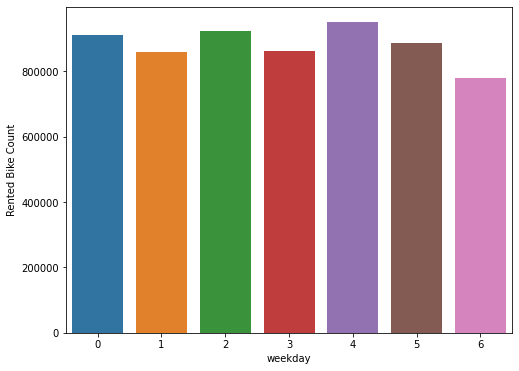

In [169]:
# bike rented on various days of the week
sns.barplot(x ='weekday', y ='Rented Bike Count', data = bike_data.groupby('weekday')['Rented Bike Count'].sum().reset_index().sort_values("weekday", ascending=True), palette ='tab10')

There is no significant difference in bike rented on various days of the weeks, but minimum bike rented on Sunday.

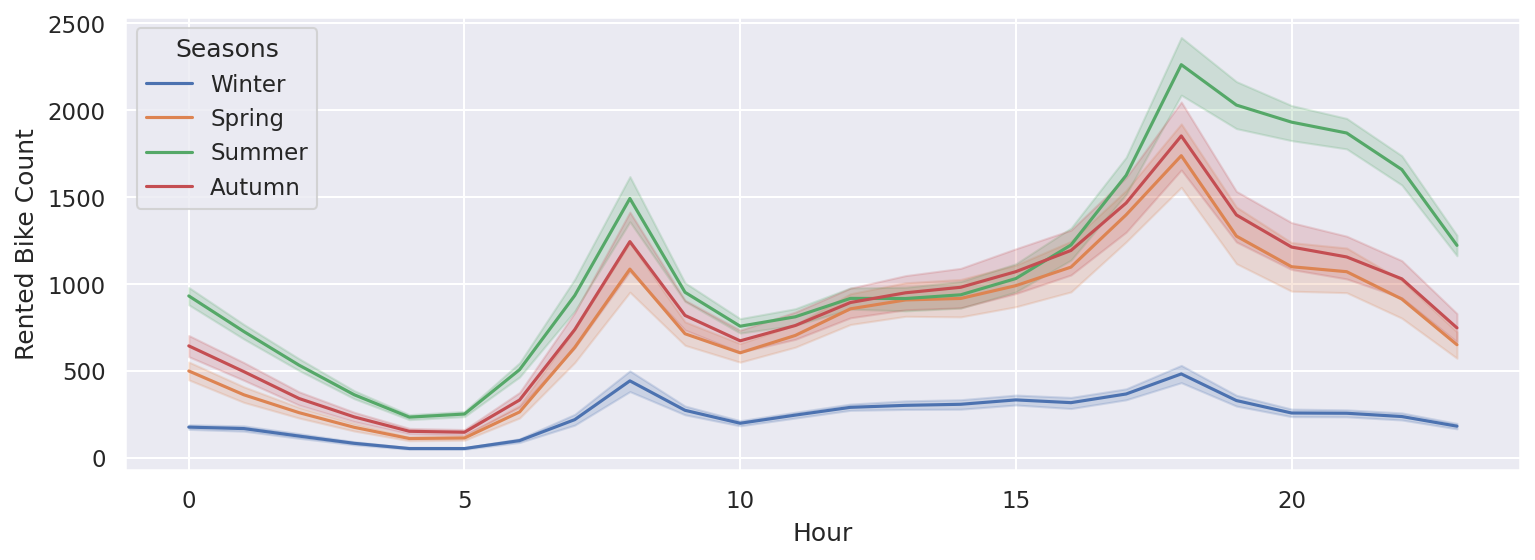

In [259]:
# line plot for bike rented on various seasonal at various hours of a day
plt.figure(figsize=(12,4), dpi=150)
sns.lineplot(data=bike_data, x="Hour", y="Rented Bike Count", hue="Seasons")

In [170]:
# total data for each year
bike_data['Year'].value_counts()

2018    8016
2017     744
Name: Year, dtype: int64

The data available is for 2017 and 2018.

In [146]:
#bar plot for bike rented on various months of different years
import plotly.express as px
px.bar(bike_data.groupby(['Year','Month'])['Rented Bike Count'].sum().reset_index(),y= 'Rented Bike Count',x='Month' ,facet_row= 'Year',title='Total Rented Bikes on monthly basis in 2017 and 2018',width=800, height=800)

From the above graph, it can be concluded that the bike count is less in December, January, February (i.e. in winter) and maximum in June followed by July and May.

# Checking distribution of our dependent variable

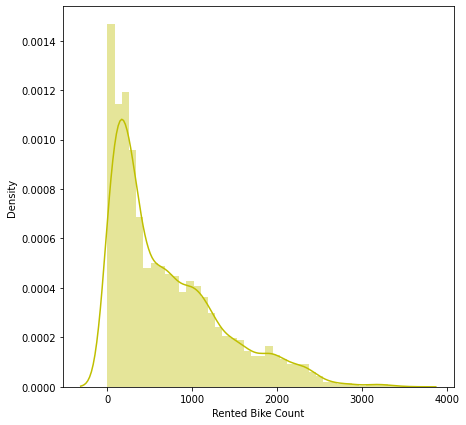

In [171]:
# Dependent variable 'Rented Bike Count'
plt.figure(figsize=(7,7))
sns.distplot(bike_data['Rented Bike Count'],color="y")

Dependent variable 'Rented Bike Count' is positively skewed. so, we have to apply some transformation to covert it into normal distribution. 

Our dependent variable contains value = 0, therefore we don't apply log transformation here.  

Lets apply square-root transformation.

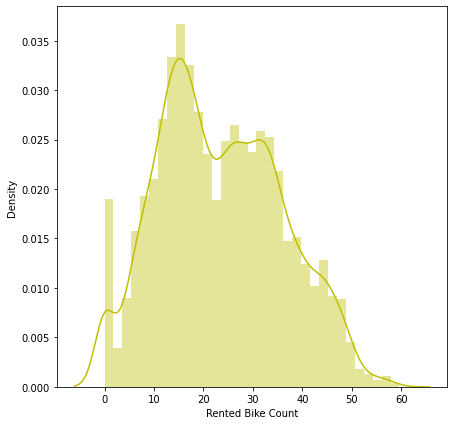

In [148]:
# Dependent variable 'Rented Bike Count'
plt.figure(figsize=(7,7))
sns.distplot(np.sqrt(bike_data['Rented Bike Count']),color="y")

The distribution is almost seems to be normal after distribution.

# Exploring Categorical variables

In [149]:
categorical_features = bike_data.describe(include='object').columns
categorical_features

Index(['Seasons', 'Holiday', 'Functioning Day'], dtype='object')

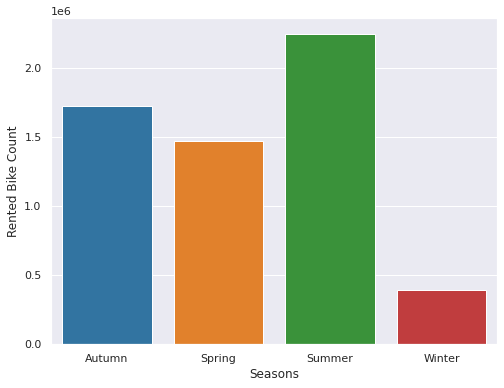

In [256]:
# Total bike rented in various seasons of the year
sns.barplot(x ='Seasons', y ='Rented Bike Count', data = bike_data.groupby('Seasons')['Rented Bike Count'].sum().reset_index(), palette ='tab10')

People borrows least bikes in Winter and maximum bikes in Summer.

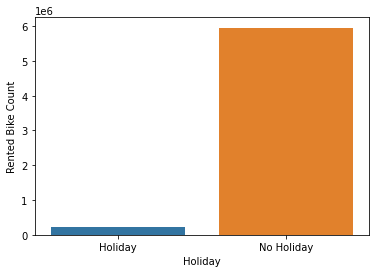

In [151]:
# total bike rented on holidays and non-holidays
sns.barplot(x ='Holiday', y ='Rented Bike Count', data = bike_data.groupby('Holiday')['Rented Bike Count'].sum().reset_index(), palette ='tab10')

People prefer to borrow bikes during non-holidays.

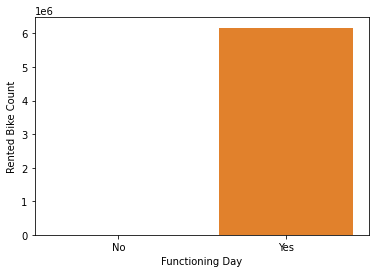

In [152]:
# Total bike rented on function and non-functional days
sns.barplot(x ='Functioning Day', y ='Rented Bike Count', data = bike_data.groupby('Functioning Day')['Rented Bike Count'].sum().reset_index(), palette ='tab10')

Thus, people only borrows bike during functional days of the week.

# Exploring Numerical Features

In [224]:
# Extracting independent numerical features from dataset
numerical_features = [coluumn for coluumn in bike_data.describe().columns if coluumn not in ['Rented Bike Count','Year','Month','weekday']]
numerical_features

['Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

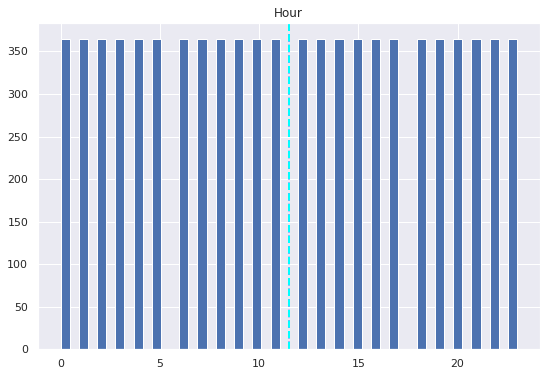

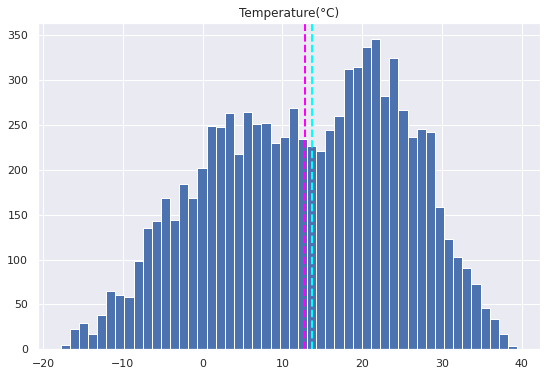

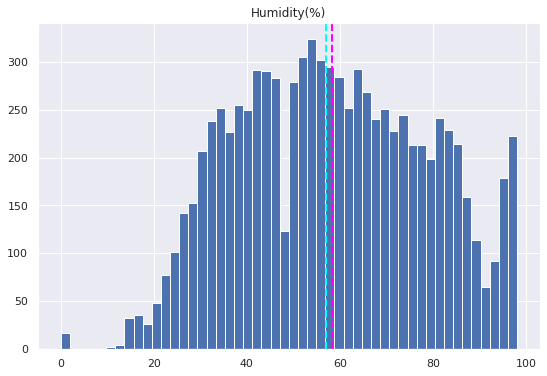

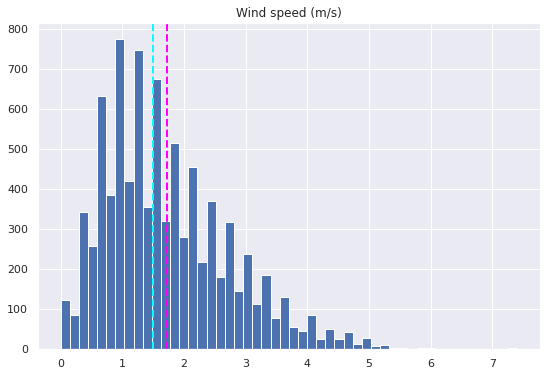

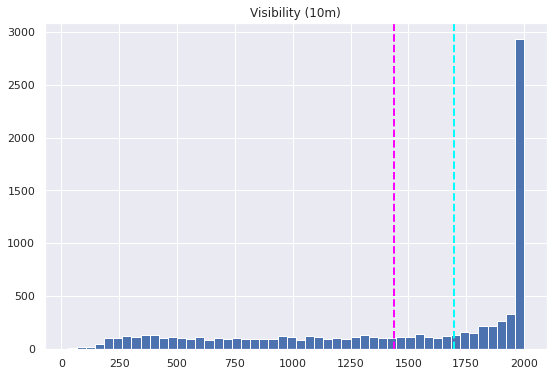

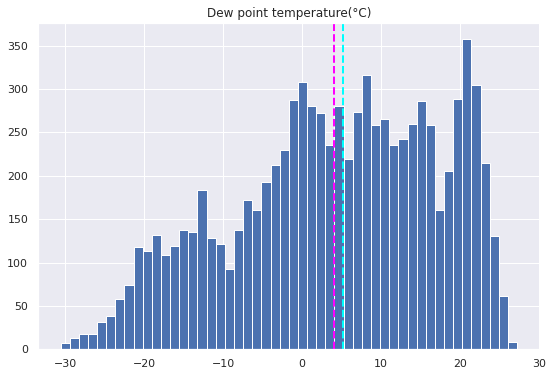

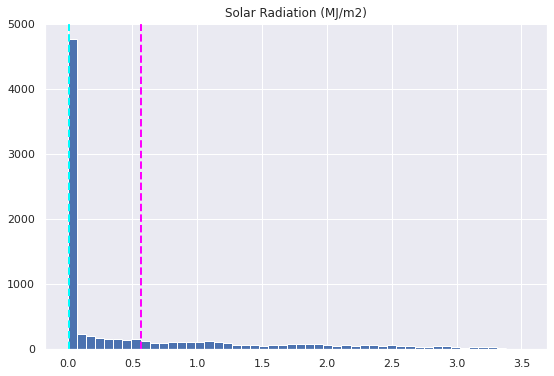

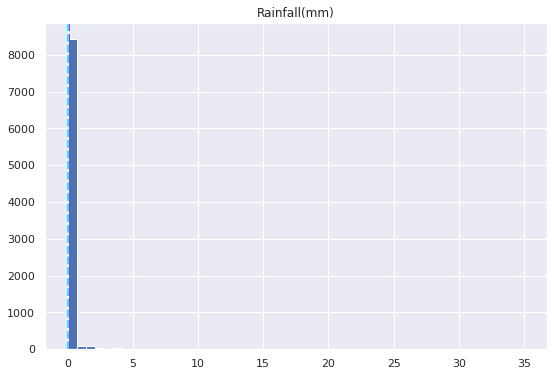

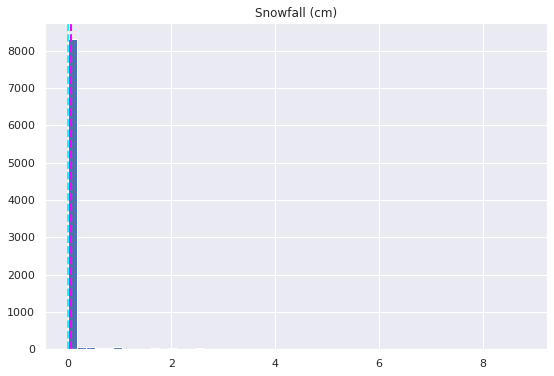

In [239]:
# plot a bar plot for each numerical feature count
for col in numerical_features[:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_data[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

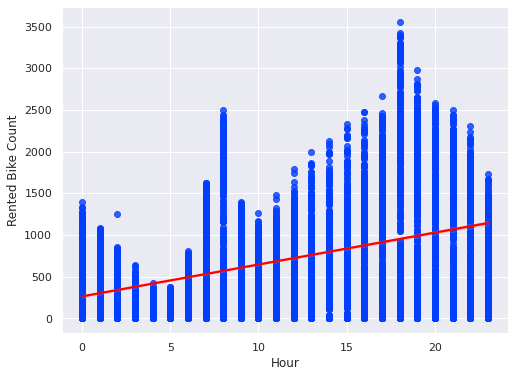

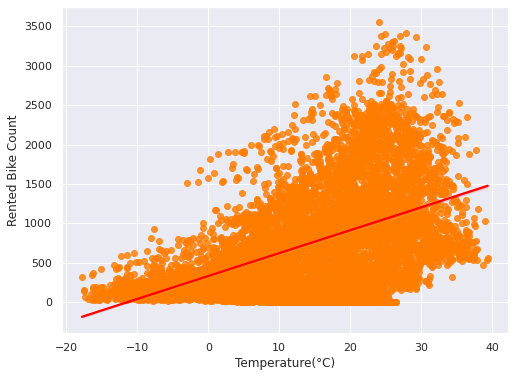

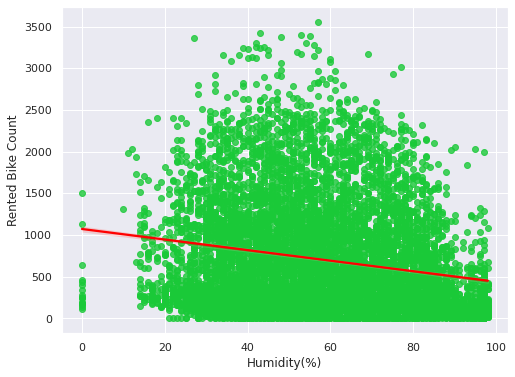

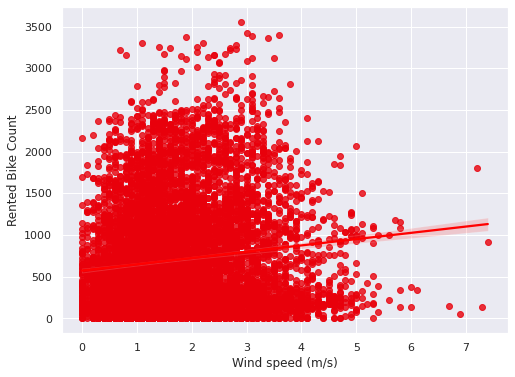

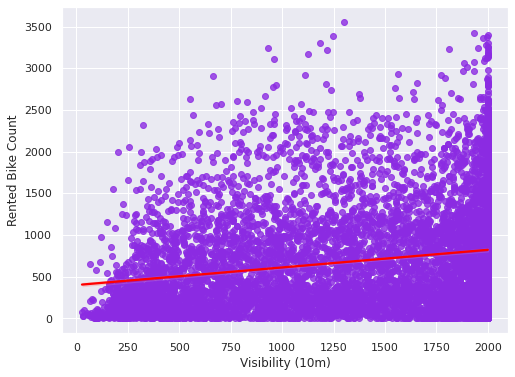

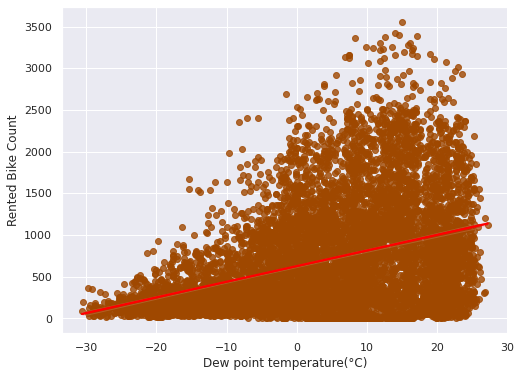

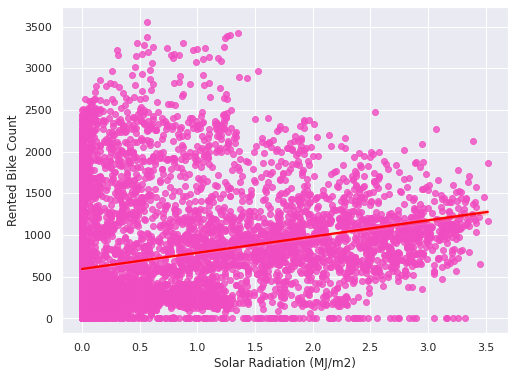

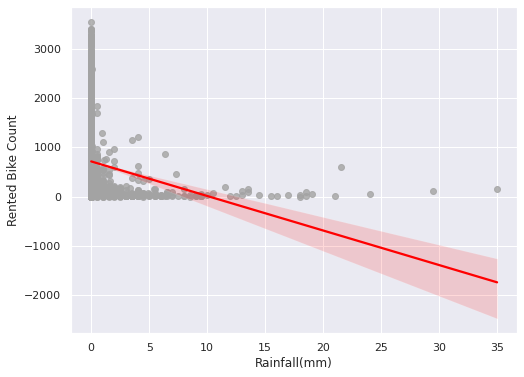

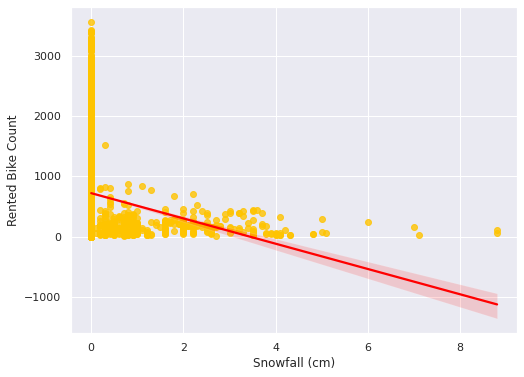

In [240]:
#plot for numerical feature
plt.rcParams['figure.figsize'] = (8, 6)
color_map = dict(zip(numerical_features, sns.color_palette("bright")))
for col, key in zip(numerical_features, color_map):
  plt.figure()
  sns.regplot(x=bike_data[col], y = bike_data['Rented Bike Count'],scatter_kws={"color": color_map[key]}, line_kws={"color": "Red"})

since data is not proper linear regression  in snowfall, rainfall, wind speed and humidity.  Let's plot box plot 

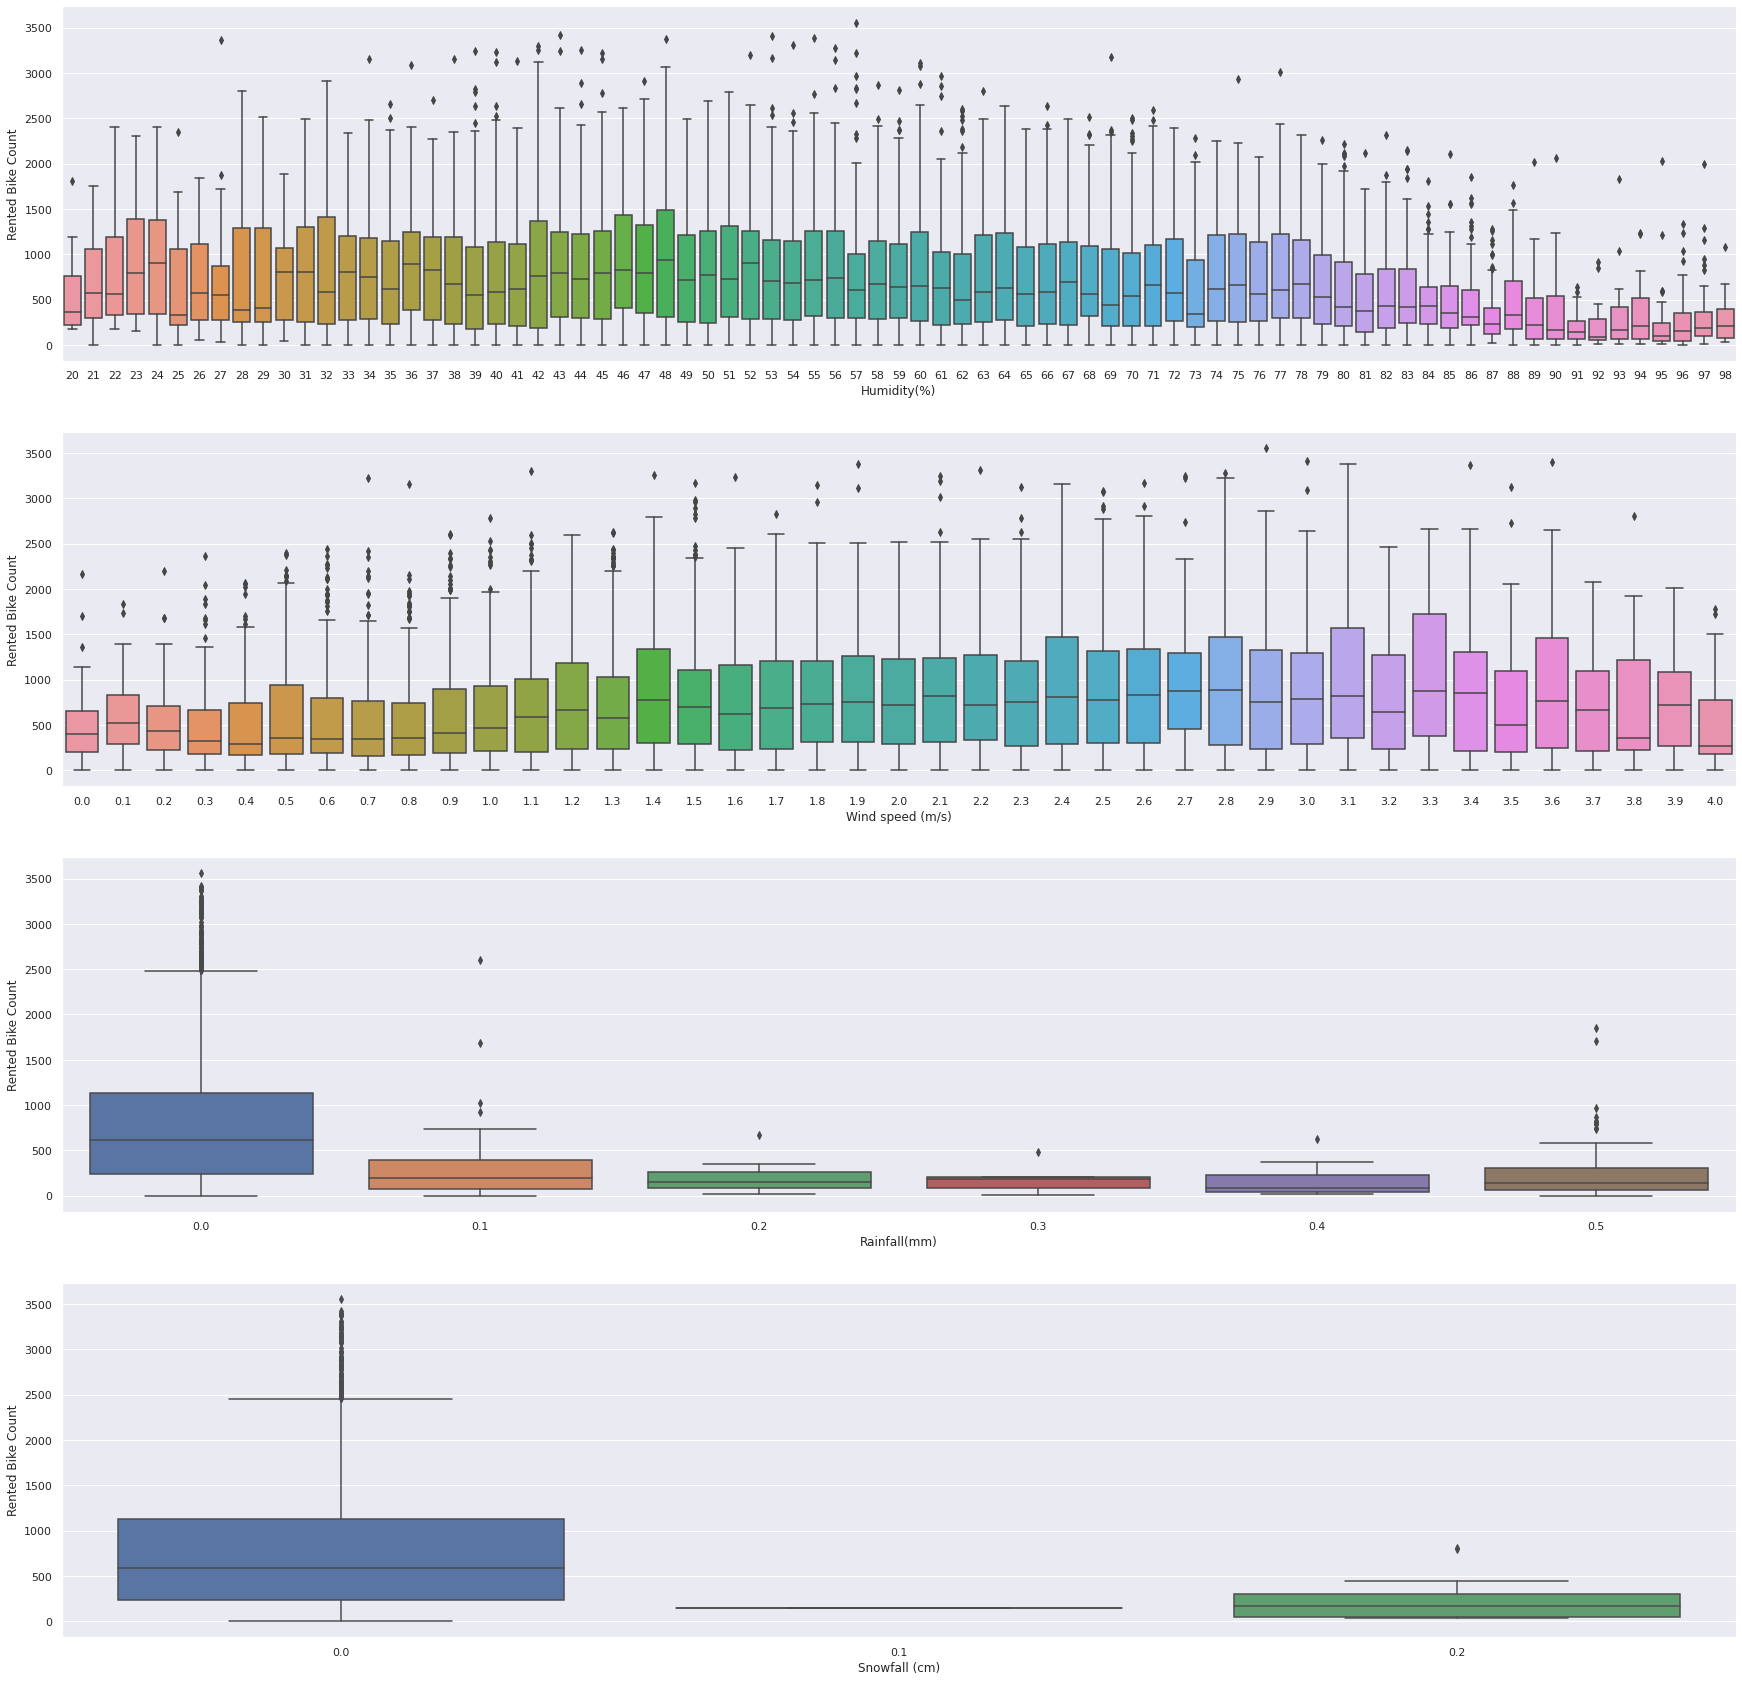

In [235]:
# box plot 
sns.set(font_scale=1.0)
fig, axes = plt.subplots(nrows=4)
fig.set_size_inches(30,30)

sns.boxplot(data=bike_data,y="Rented Bike Count",x="Humidity(%)",orient="v",ax=axes[0])
sns.boxplot(data=bike_data,y="Rented Bike Count",x="Wind speed (m/s)",orient="v",ax=axes[1])
sns.boxplot(data=bike_data,y="Rented Bike Count",x="Rainfall(mm)",orient="v",ax=axes[2])
sns.boxplot(data=bike_data,y="Rented Bike Count",x="Snowfall (cm)",orient="v",ax=axes[3])

# Effects of Numerical features in rented bike count:-

Hour: Demand for bike is mostly in morning (7 to 8) and in the evening (3 to 9).



Humidity : Humidity is the amount of water vapor in the air. So, People preferring to borrow bike When there is less humidity.

Dew point: The dew point is the temperature the air needs to be cooled to (at constant pressure) in order to achieve a relative humidity. It is positively correlated with data.

*   Hour: Demand for bike is mostly in morning (7am to 9am) and in the evening (5pm to 8pm). People generally borrows bike during office hour.
*   Temperature : Temperature is positively correlated. Rented bike count is highest between 20 °C and 30 °C.
*   Humidity : Humidity is the amount of water vapor content present in the air. Humidity is negatively correlated. So, People preferring to borrow bike When there is less humidity.
*   Wind_speed : wind speed doesn't affect our data much but people prefer borrowing bike when speed is less than 4m/s.
*   SnowFall: People don't prefer borrowing bike, where there is snowfall.
*   RainFall: People don't prefer borrowing bike, where there is rainfall.
*   Dew point:It is the point at which air cannot hold more water vapour(i.e. air became saturated). It is positively correlated with data.

# Dropping unnecessary columns 

In [225]:
bike_data.drop(['Date','Year'], axis=1, inplace=True)

# Let's try to remove outlier(Unwanted or Extra which makes our dataset quiet unwell) from our dataset.

Let's keep the data only for humidity > 20, wind speed < 4, rainfall <0.5 and snowfall<0.25 and drop unnecessary columns like Date and Year.

In [242]:
bike_data = bike_data[(bike_data["Wind speed (m/s)"]<=4) & (bike_data["Humidity(%)"]>=20) & (bike_data["Rainfall(mm)"]<=0.5) & (bike_data["Snowfall (cm)"]<=0.25)]
bike_data.drop(['Date','Year'], axis=1, inplace=True)

Let's Draw one more time regression scatter plot between dependent and all the indendent variable...

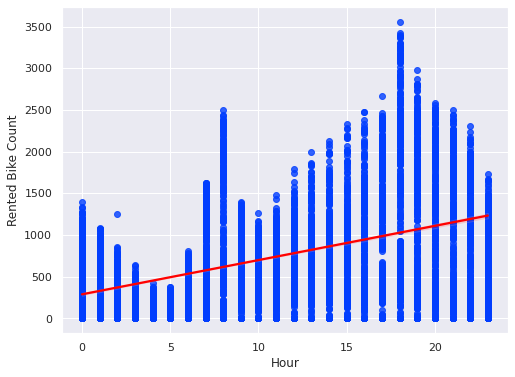

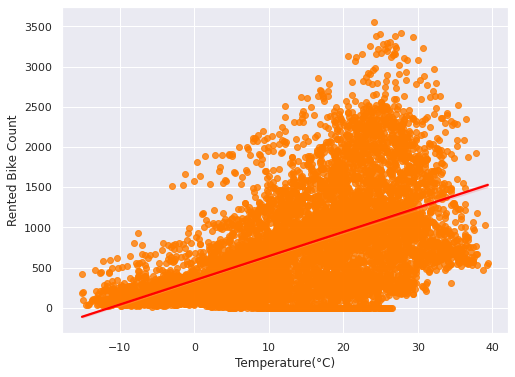

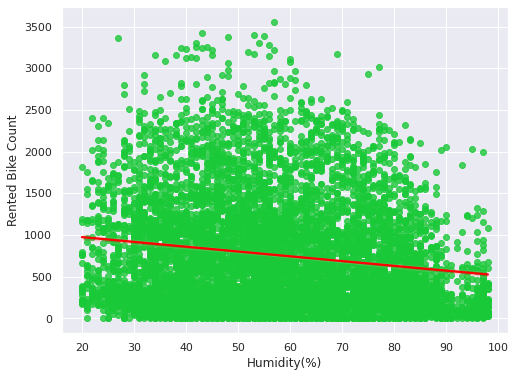

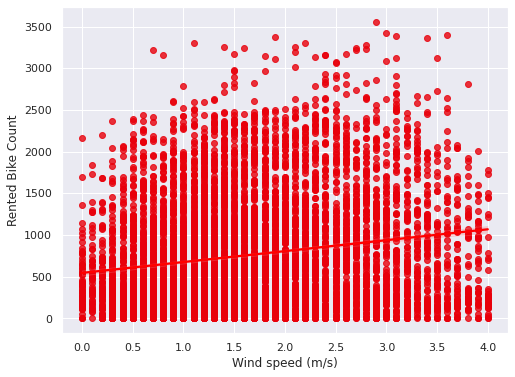

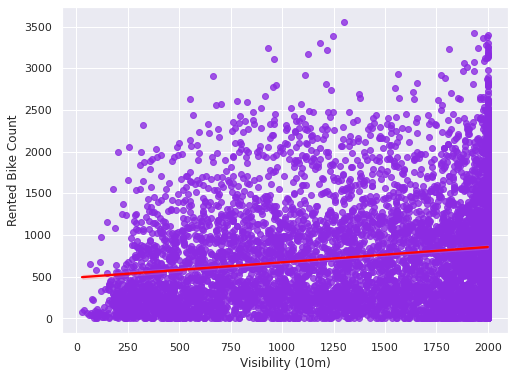

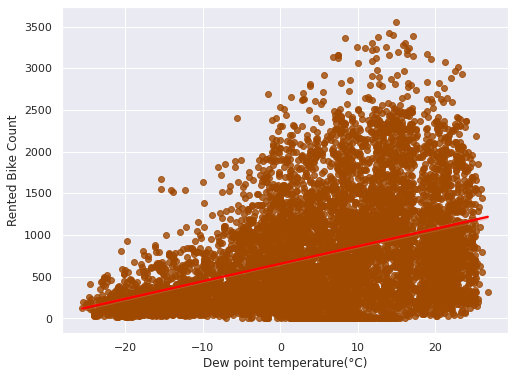

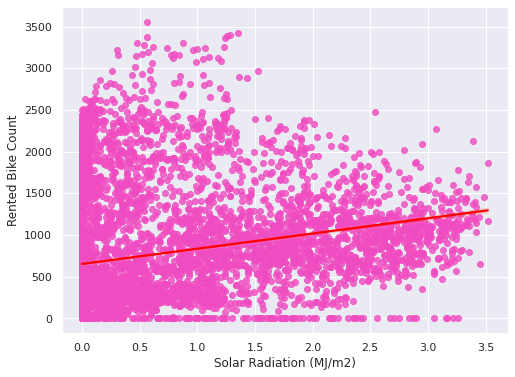

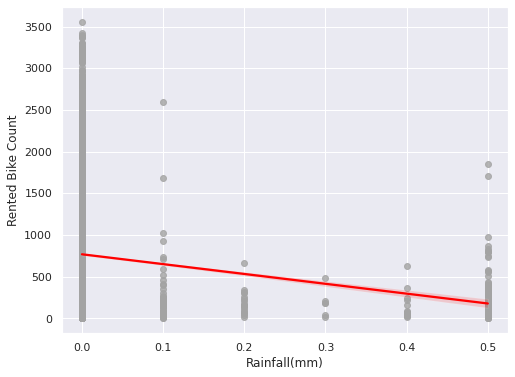

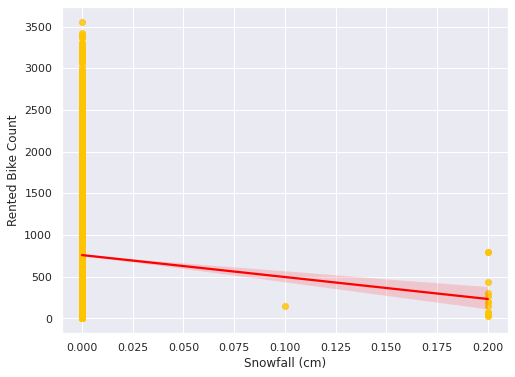

In [243]:
plt.rcParams['figure.figsize'] = (8, 6)
color_map = dict(zip(numerical_features, sns.color_palette("bright")))
for col, key in zip(numerical_features, color_map):
  plt.figure()
  sns.regplot(x=bike_data[col], y = bike_data['Rented Bike Count'],scatter_kws={"color": color_map[key]}, line_kws={"color": "Red"})

After removing outlier we are getting our regression scatter plot in a quiet well manner now we can find out the relation between them.

In [244]:
bike_data.shape

(7693, 15)

# Correlation

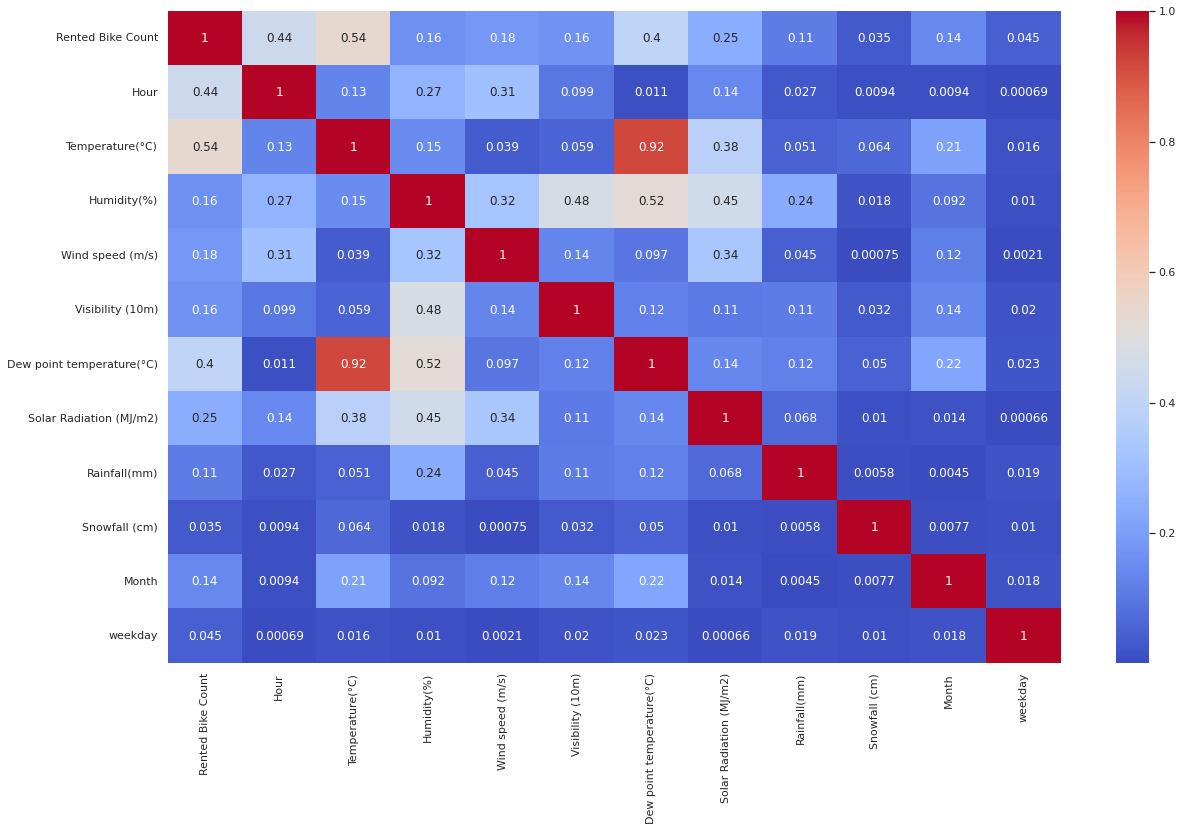

In [245]:
# Lets see correlation graph
plt.figure(figsize=(20,12))
correlation = bike_data.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

Here, temperture, dew point temperture and humidity are highly correlated with each other. Let us find out VIF to remove multicollinearity.

In [246]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [234]:
calc_vif(bike_data[[i for i in bike_data.describe().columns if i not in ['Rented Bike Count']]])

,variables,VIF
0,Hour,4.386760
1,Temperature(°C),39.777877
2,Humidity(%),7.987822
3,Wind speed (m/s),5.418202
4,Visibility (10m),9.760033
5,Dew point temperature(°C),18.736940
6,Solar Radiation (MJ/m2),2.859813
7,Rainfall(mm),1.076402
8,Snowfall (cm),1.008649
9,Month,5.393103


Here, VIF of Temperature and Dew point temperature are greater than 10. Let check if after removing Dew point Temperature VIF of all independent variable should be under 10.

In [221]:
calc_vif(bike_data[[i for i in bike_data.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)'] ]])

,variables,VIF
0,Hour,3.897178
1,Temperature(°C),3.463548
2,Humidity(%),7.130637
3,Wind speed (m/s),5.064194
4,Visibility (10m),5.654110
5,Solar Radiation (MJ/m2),2.233091
6,Rainfall(mm),1.136533
7,Snowfall (cm),1.115036
8,Month,5.152872
9,weekday,3.128868


After removing Dew point Temperature VIF of all the independent variables will be under 10. 

In [247]:
# Dropping column Dew point temperature from our dataset
bike_data.drop('Dew point temperature(°C)', axis=1, inplace=True)